In [3]:
import pymysql
from cryptography.fernet import Fernet
import json
from collections import namedtuple
import time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


<b> Decrypt the credentials </b>

In [4]:
#Uncode the secret license file
def unencrypt():
    try:
        key = b'IXx5rHfP15FqP4ahx2pwcud-XmcBzU553Ri6p-nVhnc=' #Fernet.generate_key()
        cipher_suite = Fernet(key)
        with open('/usr/local/etc/musicmood_bytes.bin', 'rb') as file_object:
            for line in file_object:
                encryptedpwd = line
        uncipher_text = (cipher_suite.decrypt(encryptedpwd))
        plain_text_encryptedpassword = bytes(uncipher_text).decode("utf-8") #convert to string
        x = json.loads(plain_text_encryptedpassword, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
        return x
    except Exception as e:
        print(str(e))
        return "Error" 

<b> Connect to the Database </b>

In [5]:
#Setup the database connection
credentials = unencrypt()
user_id = credentials.user
user_password = credentials.password
dbname = credentials.dbname
server = credentials.server
conn = pymysql.connect(server,user_id,user_password,dbname)

<b> Obtain the data from the Database </b>

In [6]:
start_time = time.time()
df = pd.read_sql('SELECT * FROM songs_instance', con = conn)
print("--- %s seconds ---" % (time.time() - start_time))
df.head(15)

--- 1.3225889205932617 seconds ---


,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,...,Spoken_Word,Weeks_on_Chart,as_primary_genre,number_1s,weeks_at_number_1,chart_appearances,artist_weeks_at_number_1,tempo2,speed_general,num_weeks
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,...,0.0,23.0,Rock,5.0,23.0,887,23,120.658,3,23
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,...,0.0,30.0,Pop,12.0,32.0,857,32,119.888,2,30
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,...,0.0,21.0,Pop,12.0,32.0,857,32,115.613,2,21
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,...,0.0,26.0,Soul,7.0,11.0,657,11,112.747,2,26
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,...,NaN,NaN,None,7.0,11.0,657,11,131.183,3,23
5,TRMDYGQ128F14963D6,1472,Part-Time Lover,Stevie Wonder,21,1,93,1,8,10,...,NaN,NaN,None,7.0,11.0,657,11,87.268,2,21
6,TRABKEC128F424DF63,1379,You Haven't Done Nothin,Stevie Wonder,19,1,93,1,7,11,...,NaN,NaN,None,7.0,11.0,657,11,102.516,2,19
7,TRWJKVP128F92DCA7E,1850,Billie Jean,Michael Jackson,25,1,98,7,11,13,...,0.0,25.0,Pop,11.0,30.0,607,30,117.032,2,25
8,TRBIGLJ12903CBAC47,1796,Rock With You,Michael Jackson,24,1,96,4,9,13,...,0.0,24.0,Pop,11.0,30.0,607,30,114.547,2,24
9,TRXHRYZ128F4264957,1302,Don't Stop 'til You Get Enough,Michael Jackson,21,1,98,1,6,9,...,0.0,0.0,Pop,11.0,30.0,607,30,119.235,2,21


<B> Describe the dataset </B>

In [8]:
df.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,...,Soundtrack,Spoken_Word,Weeks_on_Chart,number_1s,weeks_at_number_1,chart_appearances,artist_weeks_at_number_1,tempo2,speed_general,num_weeks
count,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,...,6222.000000,6222.0,6222.000000,2855.000000,2855.000000,8225.000000,8225.000000,8011.000000,8225.000000,8225.000000
mean,710.236960,13.226505,37.423465,88.815198,0.175562,1.667234,3.243040,4.731672,6.128024,7.458480,...,0.000482,0.0,13.277563,2.381086,6.610858,157.841459,2.294711,121.816716,2.481337,13.226505
std,679.317662,8.757258,29.765519,11.729135,1.233179,3.871511,5.726534,6.979479,7.871121,8.494004,...,0.021955,0.0,7.721333,2.492130,9.239905,154.223510,6.287588,29.299979,0.556770,8.757258
min,0.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,194.000000,7.000000,10.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,7.000000,1.000000,2.000000,42.000000,0.000000,100.245000,2.000000,7.000000
50%,577.000000,12.000000,31.000000,93.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,...,0.000000,0.0,13.000000,1.000000,4.000000,107.000000,0.000000,119.968000,3.000000,12.000000
75%,1062.000000,18.000000,62.000000,98.000000,0.000000,1.000000,6.000000,9.000000,11.000000,12.000000,...,0.000000,0.0,19.000000,3.000000,7.000000,216.000000,2.000000,137.630000,3.000000,18.000000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,...,1.000000,0.0,69.000000,19.000000,86.000000,887.000000,86.000000,244.788000,3.000000,104.000000


<b> Histograms </b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a162086d8>,
      dtype=object)

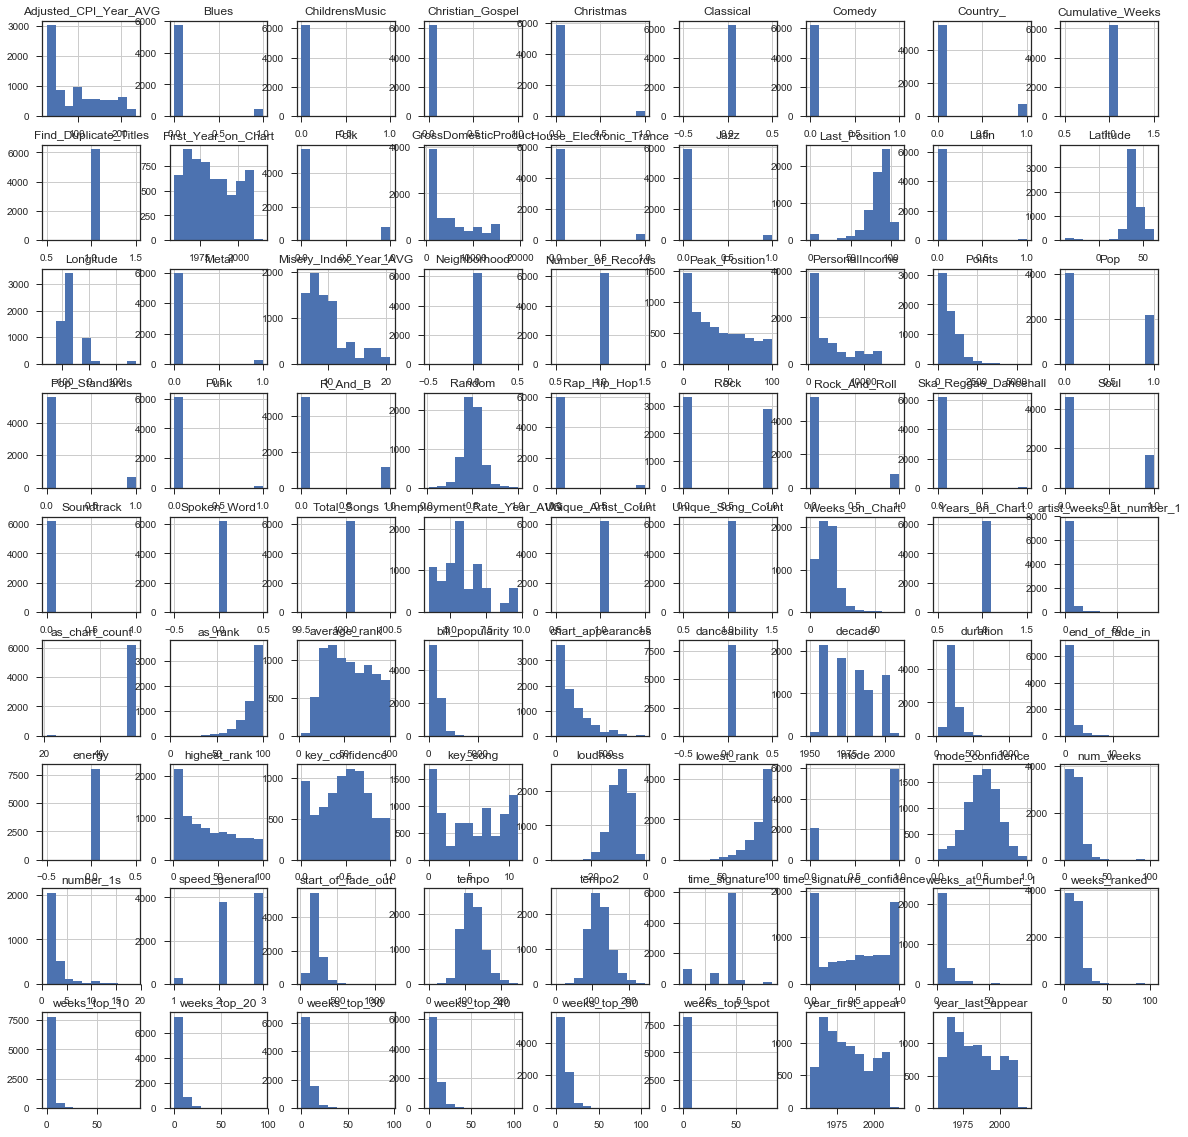

In [9]:
df.hist(figsize=(20,20))

In [10]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

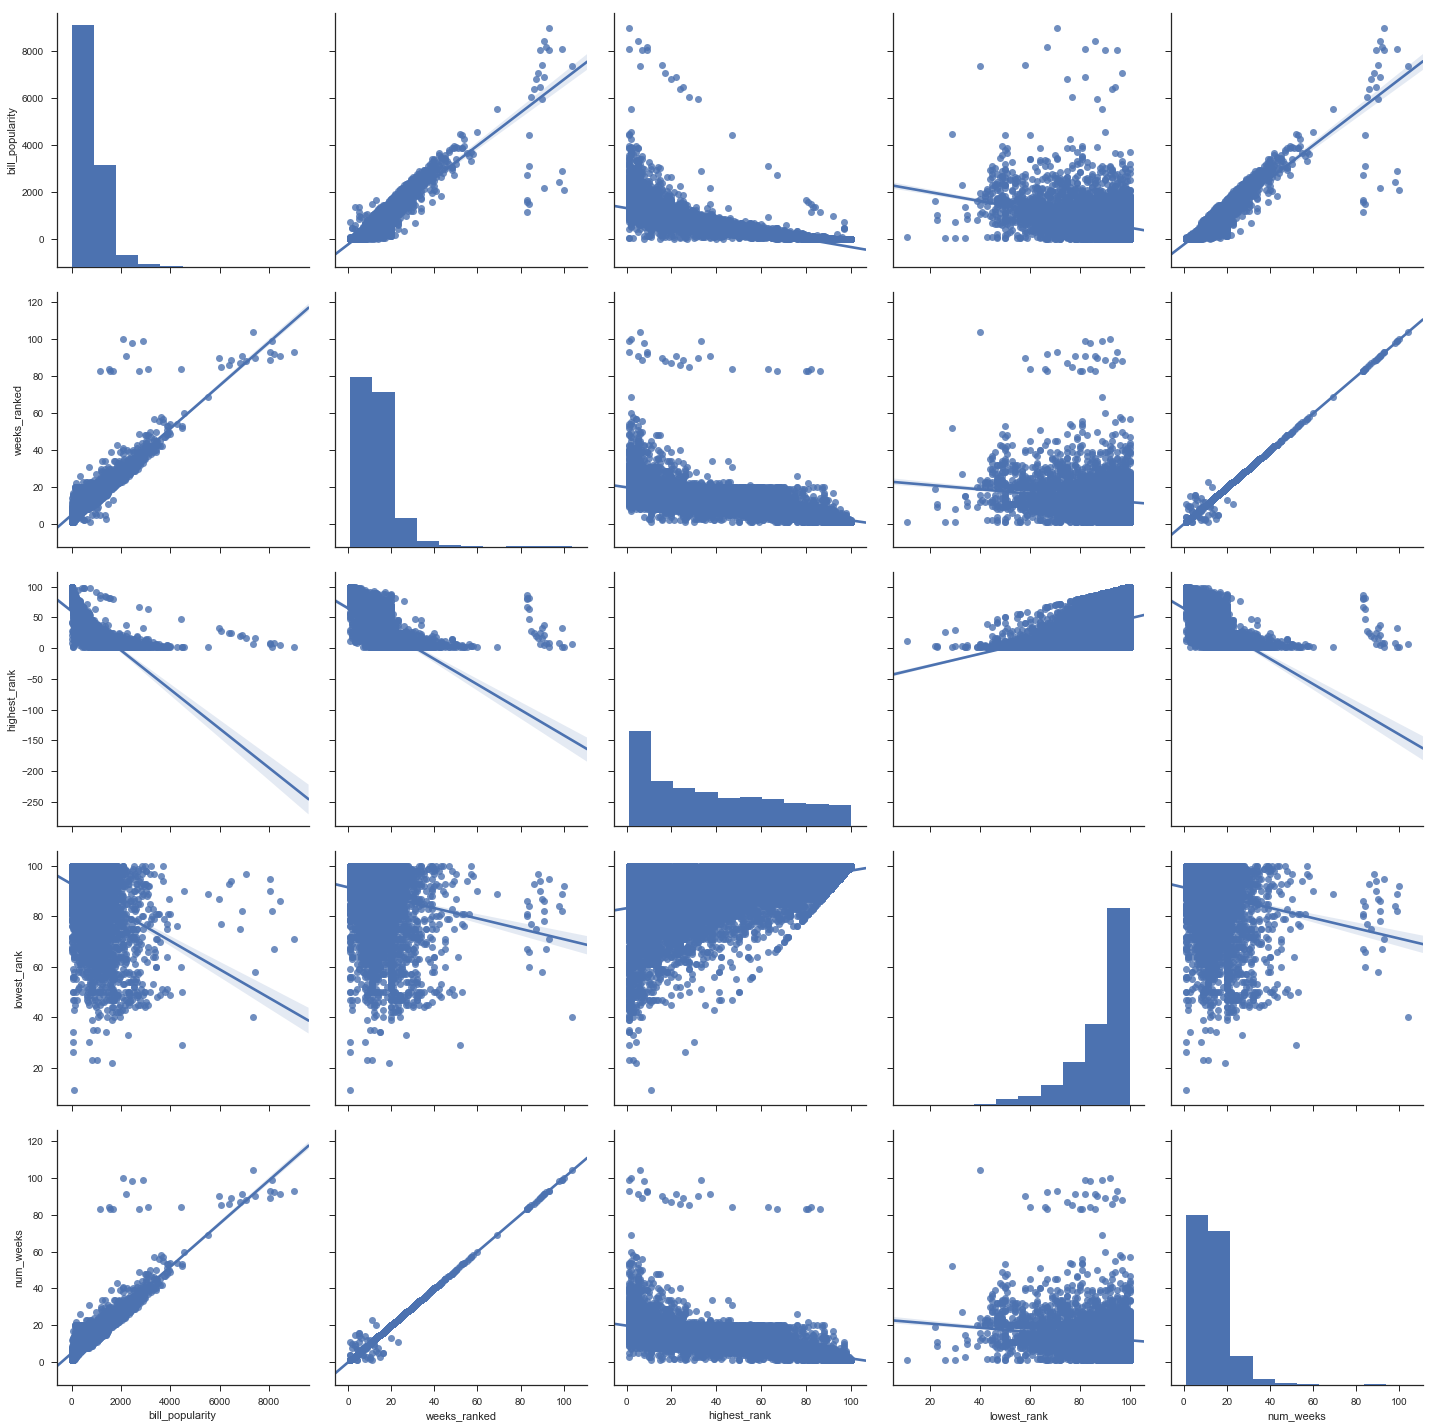

In [16]:
#g = sns.pairplot(df, size=1, vars=['bill_popularity', 'weeks_ranked', 'highest_rank', 'lowest_rank', 'weeks_top_spot', 'weeks_top_10', 'weeks_top_20', 'weeks_top_30', 'weeks_top_40', 'weeks_top_50', 'average_rank', 'first_appearance', 'year_first_appear', 'last_appearance', 'year_last_appear', 'decade', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'key_confidence', 'key_song', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'GrossDomesticProduct', 'PersonalIncome', 'Unemployment_Rate_Year_AVG', 'Adjusted_CPI_Year_AVG', 'Misery_Index_Year_AVG', 'Blues', 'Cumulative_Weeks', 'Unique_Song_Count', 'Unique_Artist_Count', 'as_chart_count', 'Total_Songs', 'Find_Duplicate_Titles', 'First_Year_on_Chart', 'Years_on_Chart', 'Points', 'Random', 'ChildrensMusic', 'Christian_Gospel', 'Christmas', 'Classical', 'Comedy', 'Country_', 'Folk', 'House_Electronic_Trance', 'Jazz', 'Last_Position', 'Latin', 'Latitude', 'Longitude', 'Metal', 'Neighborhood', 'Number_of_Records', 'Peak_Position', 'Pop_Standards', 'Pop', 'Punk', 'R_And_B', 'as_rank', 'Rap_Hip_Hop', 'Rock_And_Roll', 'Rock', 'Ska_Reggae_Dancehall', 'Soul', 'Soundtrack', 'Spoken_Word', 'Weeks_on_Chart', 'number_1s', 'weeks_at_number_1', 'chart_appearances', 'artist_weeks_at_number_1', 'tempo2', 'speed_general', 'num_weeks'], kind="reg")
g = sns.pairplot(df, size=4, vars=['bill_popularity', 'weeks_ranked', 'highest_rank','lowest_rank','num_weeks'], kind="reg")